# 1. Описание данных

In [ ]:
import pandas as pd
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
users = pd.read_csv('telecom_users.csv')
users

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


## 1.1 Исследование типов данных, представленных в датафрейме, и, при необходимости, первичное преобразование

In [ ]:
users.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

В данном датасете имеется 16 категориальных признаков и 3 вещественных. 

Мы видим, что колонка TotalCharges имеет тип данных object, а по внешнему виду должна иметь тип float

In [ ]:
# удаляем из датасета строки, в которых отсутствует значение общих затрат за все время пользования услугами
# т.к. мы не можем пустую строку преобразовать в тип
users = users.drop(users['TotalCharges'][users['TotalCharges'].str.isspace()].index)
# преобразование столбца TotalCharges к типу float
users['TotalCharges'] = users['TotalCharges'].astype(float)

## 1.2 Количество клиентов которые остались (Non-churn) и клиентов которые ушли в отток (Churn)

In [ ]:
users_churned = users[users['Churn'] == 'Yes']
users_actived = users[users['Churn'] == 'No']

print('Количество клиентов, которые ушли в отток -', users_churned.shape[0])
print('Количество клиентов, которые остались -', users_actived.shape[0])

Количество клиентов, которые ушли в отток - 1587
Количество клиентов, которые остались - 4389


Датасет является несбалансированным, клиентов которые остались почти в 3 раза больше. Скорее всего наши модели будут намного лучше опеределять клиентов которые с большей вероятностью продлят контракт

## 1.3.1 Графики распределения категориальных признаков по ушедшим и действующим клиентам

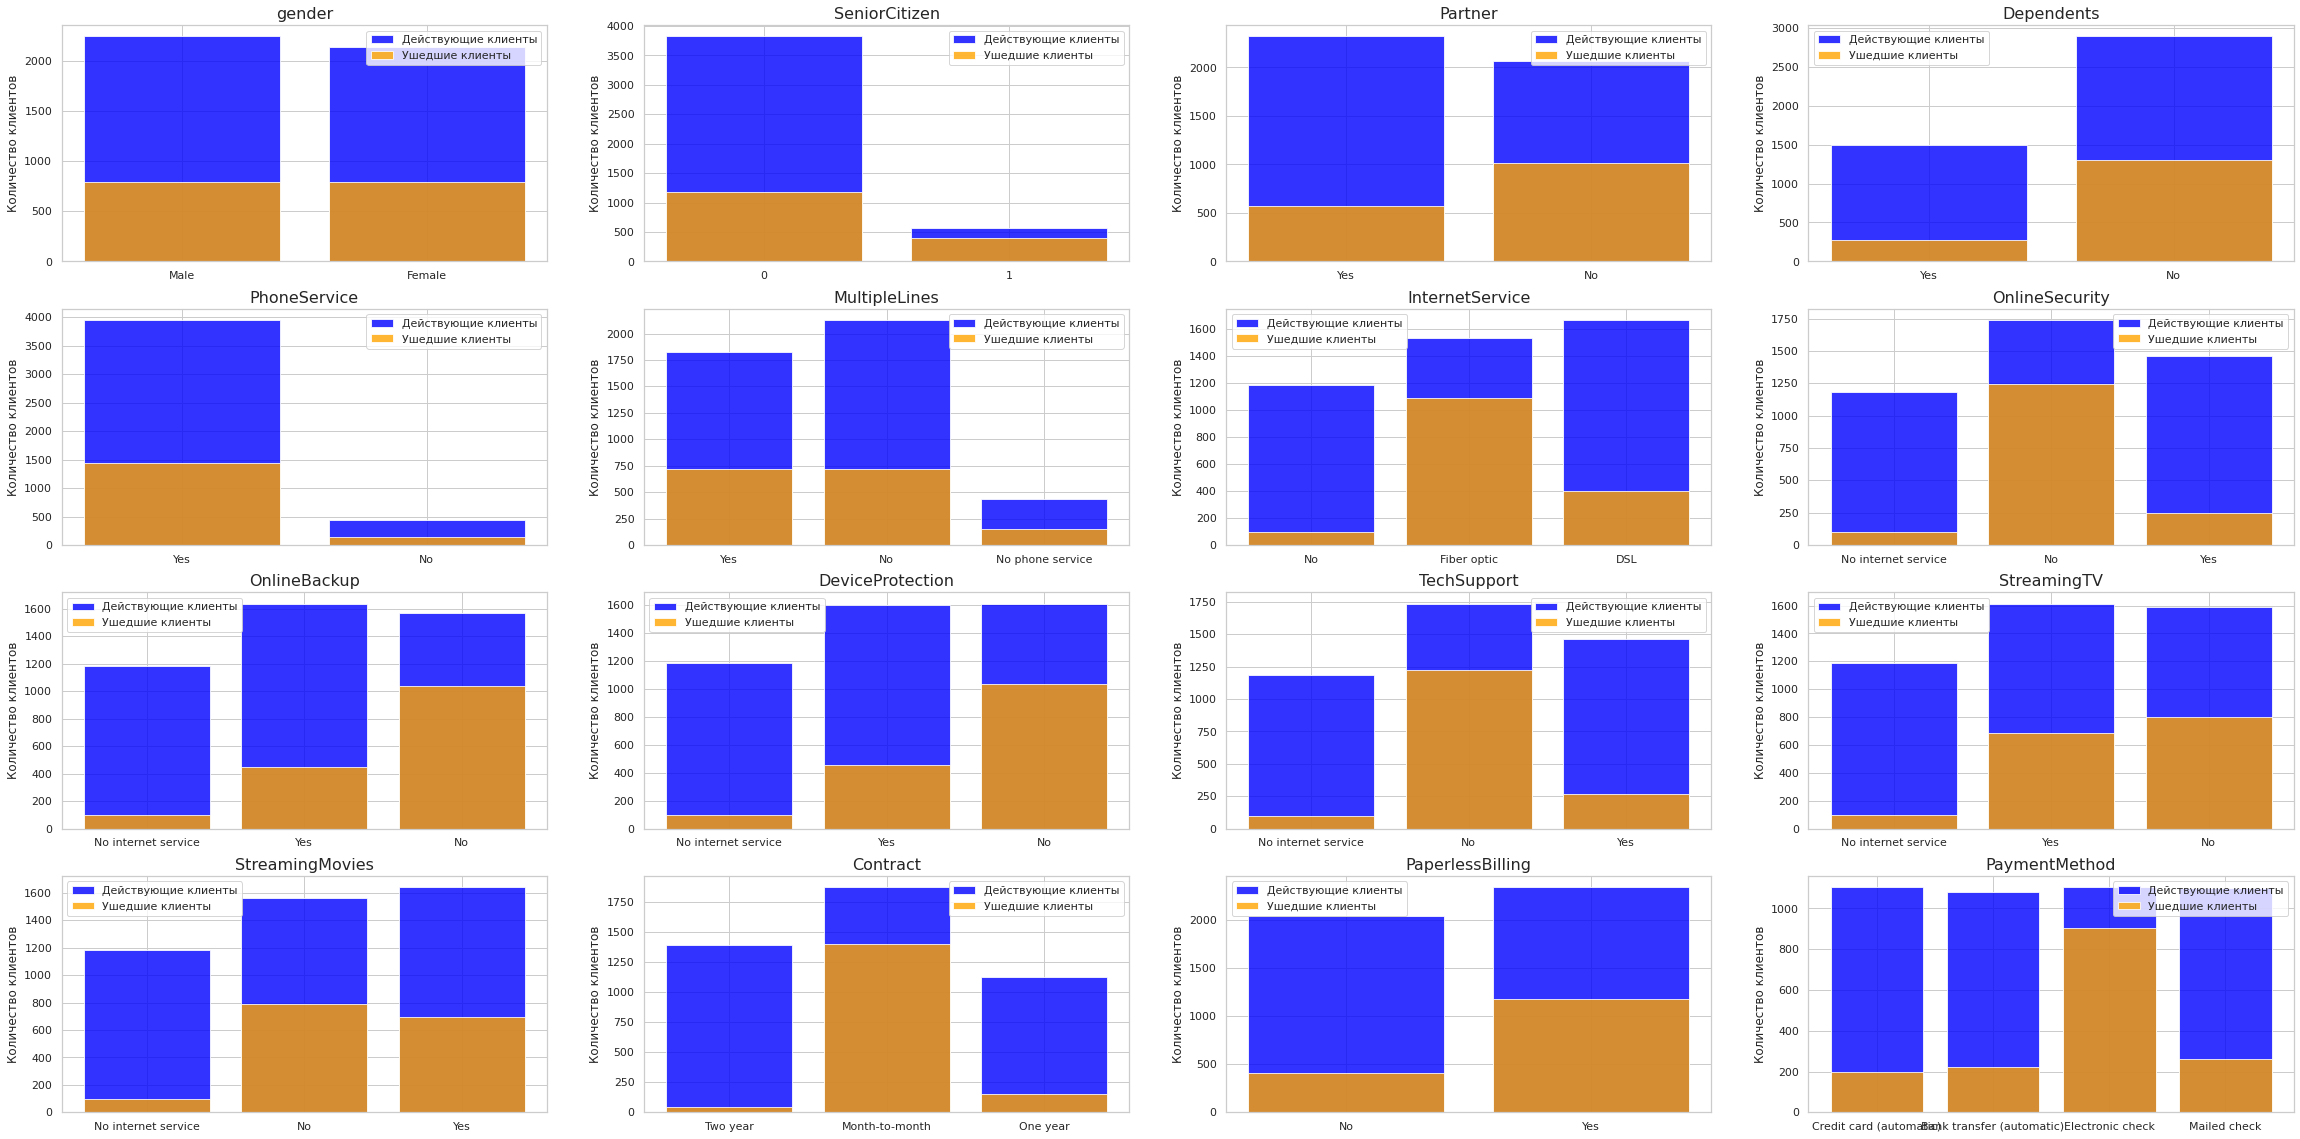

In [ ]:
# Создаем фигуру, состоящую из 4 строк и 4 столбцов, на которой будут размещены все графики распределения категориальных признаков

fig, axes = plt.subplots(4, 4, figsize=(40, 20))
row, column = 0, 0

# список категориальных признаков
categorical_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

# через цикл по названиям признаков заполняем графики 
for feature in categorical_list:
    for i, option in enumerate(users[feature].unique()):
        churn_count = users_churned[users_churned[feature] == option][feature].count()
        active_count = users_actived[users_actived[feature] == option][feature].count()
        
        if i != 0:
          axes[row, column].bar(f'{option}', active_count, label=f'_Действующие клиенты', color='blue', alpha=0.8)
          axes[row, column].bar(f'{option}', churn_count, label=f'_Ушедшие клиенты', color='orange', alpha=0.8)
        
        else:
          axes[row, column].bar(f'{option}', active_count, label='Действующие клиенты', color='blue', alpha=0.8)
          axes[row, column].bar(f'{option}', churn_count, label='Ушедшие клиенты', color='orange', alpha=0.8)
    
    # устанавливаем название графика и размер шрифта
    axes[row, column].set_title(feature, fontsize=16)
    # устанавливаем название оси Y и размер шрифта
    axes[row, column].set_ylabel('Количество клиентов', fontsize=12)
    #
    axes[row, column].legend()
    
    column += 1
    if column == 4:
        row += 1
        column = 0

# отрисовываем все графики
plt.show()

## 1.3.2 Графики распределения количественных признаков по ушедшим и действующим клиентам

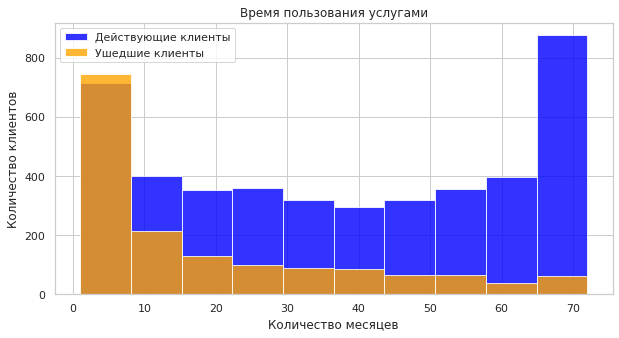

In [ ]:
# Распределение времени пользования услугами
fig = plt.figure(figsize=(10, 5))

plt.hist(users_actived['tenure'], label='Действующие клиенты', color='blue', alpha=0.8)
plt.hist(users_churned['tenure'], label='Ушедшие клиенты', color='orange', alpha=0.8)

plt.title('Время пользования услугами')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество месяцев')
plt.legend()
plt.show()

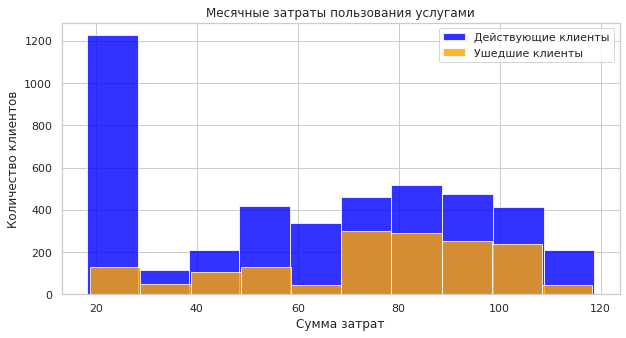

In [ ]:
# Распределение месячных затрат за пользования услугами
fig = plt.figure(figsize=(10, 5))

plt.hist(users_actived['MonthlyCharges'], label='Действующие клиенты', color='blue', alpha=0.8)
plt.hist(users_churned['MonthlyCharges'], label='Ушедшие клиенты', color='orange', alpha=0.8)

plt.title('Месячные затраты пользования услугами')
plt.ylabel('Количество клиентов')
plt.xlabel('Сумма затрат')
plt.legend()
plt.show()

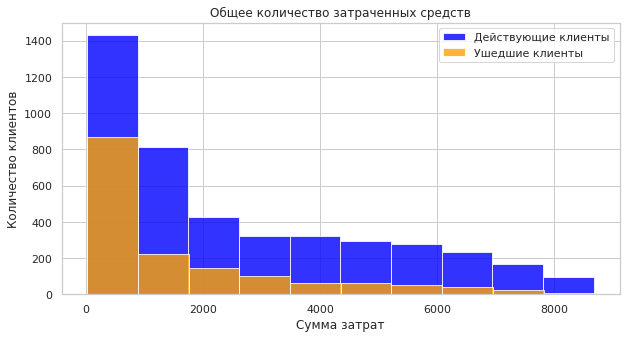

In [ ]:
# Распределение общего количества затраченных средств на пользование услугами оператора
fig = plt.figure(figsize=(10, 5))

plt.hist(users_actived['TotalCharges'], label='Действующие клиенты', color='blue', alpha=0.8)
plt.hist(users_churned['TotalCharges'], label='Ушедшие клиенты', color='orange', alpha=0.8)

plt.title('Общее количество затраченных средств')
plt.ylabel('Количество клиентов')
plt.xlabel('Сумма затрат')
plt.legend()
plt.show()

Для дальнейшей работы мы отбросим следующие признаки, т.к. данные в них не могут сильно повлиять на результат построения модели:
- gender. В данном датасете мы наблюдаем одинаковое количество людей и мужского и женского пола.

1 В основном уходят люди, которые пользуются услугами меньше года и которые не пользовались дополнительными услугами оператора (исключение - стриминговые сервисы).

2 Почти все клиенты, которые ушли, пользовались помесячной оплатой услуг

3 Большая часть клиентов, которые ушли, имели большие ежемесячные расходы на оплату услгу


Так же мы удалим столбы 'Unnamed: 0' и 'customerID' т.к. как они является индентификаторами

In [ ]:
# преобразуем значения столбца с откликом (не ушел / ушел клиент) Churn, где 1 - клиент не ушел (Yes), 0 - клиент ушел (No)
users['Churn'] = users['Churn'].map( {'Yes': 0, 'No': 1} ).astype(int)

users = users.drop(columns=['Unnamed: 0', 'customerID', 'gender']) 

 ## 1.4 Преобразование категориальных признаков

Для дальнейшний работы преобразуем исходные датасет (немного скоректированный) в 2 разных датасета:
- в первом датасете (users_map) категориальные признаки будут преобразованы интуитивно, исходя из наблюдений на выведенных графиках
- второй датасет (users_encoder) будет подготовлен для преобразования категориальных признаков методом библиотеки sklearn OneHotEncoder
- в третьем датасет методами библиотеки pandas категориальные признаки были преобразованы в числовые, количество значений - количество уникальных вариантов признака, начиная с 0 

In [ ]:
# создаем dataset, в котором все категориальные признаки заменям на число
# число, которое заменяет выриант признака выбираем самостоятельно, исходя выведенных выше графиков
 
users_map = users.copy()
 
users_map['Partner'] = users_map['Partner'].map({ 'Yes': 1, 'No': 0 }).astype(int)
users_map['Dependents'] = users_map['Dependents'].map({ 'Yes': 1, 'No': 0 }).astype(int)
users_map['PhoneService'] = users_map['PhoneService'].map({ 'Yes': 1, 'No': 0 }).astype(int)
users_map['MultipleLines'] = users_map['MultipleLines'].map({ 'Yes': 2, 'No': 1, 'No phone service': 0 }).astype(int)
users_map['InternetService'] = users_map['InternetService'].map({ 'Fiber optic': 2, 'DSL': 1, 'No': 0 }).astype(int)
users_map['OnlineSecurity'] = users_map['OnlineSecurity'].map({ 'No': 2, 'Yes': 1, 'No internet service': 0 }).astype(int)
users_map['OnlineBackup'] = users_map['OnlineBackup'].map({ 'No': 2, 'Yes': 1, 'No internet service': 0 }).astype(int)
users_map['DeviceProtection'] = users_map['DeviceProtection'].map({ 'No': 2, 'Yes': 1, 'No internet service': 0 }).astype(int)
users_map['TechSupport'] = users_map['TechSupport'].map({ 'No': 2, 'Yes': 1, 'No internet service': 0 }).astype(int)
users_map['StreamingTV'] = users_map['StreamingTV'].map({ 'No': 2, 'Yes': 1, 'No internet service': 0 }).astype(int)
users_map['StreamingMovies'] = users_map['StreamingMovies'].map({ 'No': 2, 'Yes': 1, 'No internet service': 0 }).astype(int)
users_map['Contract'] = users_map['Contract'].map({ 'Month-to-month': 2, 'One year': 1, 'Two year': 0 }).astype(int)
users_map['PaperlessBilling'] = users_map['PaperlessBilling'].map({ 'Yes': 1, 'No': 0 }).astype(int)
users_map['PaymentMethod'] = users_map['PaymentMethod'].map({ 'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0 }).astype(int)        
 
users_map

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,1,2,0,0,0,0,0,0,0,0,0,0,24.10,1734.65,1
1,0,0,0,44,1,1,2,2,1,1,2,1,2,2,1,0,88.15,3973.20,1
2,1,1,0,38,1,2,2,2,2,2,2,2,2,2,1,1,74.95,2869.85,0
3,0,0,0,4,1,1,1,2,2,2,2,2,1,2,1,3,55.90,238.50,1
4,0,0,0,2,1,1,1,1,2,1,2,2,2,2,0,3,53.45,119.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,1,1,1,2,1,2,2,2,1,1,2,1,3,95.00,95.00,0
5982,0,1,1,23,1,2,1,1,1,1,1,1,1,0,1,0,91.10,2198.30,1
5983,0,1,1,12,1,1,0,0,0,0,0,0,0,2,1,3,21.15,306.05,1
5984,1,0,0,12,1,2,2,2,2,1,2,1,1,2,1,3,99.45,1200.15,0


In [ ]:
# создаем два dataset'a
# 1-й dataset содержит только категориальные признаки
# 2-й dataset содержит только количественные признаки
# 3-й dataset содрежит отклик (ушел / не ушел клиент)
# объединяем 2 dataset'a в один так, чтобы количественные признаки оказались в конце
 
users_categorical_features = users[[
                                    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                    'DeviceProtection', 'TechSupport', 'StreamingTV',
                                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
                                    ]]
users_quantitative_features = users[['tenure', 'MonthlyCharges', 'TotalCharges']]
users_responce = users['Churn']
 
users_encoder = users_categorical_features.merge(users_quantitative_features, left_index=True, right_index=True) \
                                          .merge(users_responce, left_index=True, right_index=True)
users_encoder

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),72,24.10,1734.65,1
1,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),44,88.15,3973.20,1
2,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),38,74.95,2869.85,0
3,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,4,55.90,238.50,1
4,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,2,53.45,119.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,95.00,95.00,0
5982,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),23,91.10,2198.30,1
5983,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,12,21.15,306.05,1
5984,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,12,99.45,1200.15,0


In [ ]:
# преобразование датасета с помощью библиотеки pandas
# 1. Все категориальные признаки преобразуются из типа object в тип category
# 2. Все категориальные признаки преобразуются в числовие значения, начиная с нуля
# Количество значений для каждого признака равно количеству уникальных вариантов

users_pandas = users.copy()

users_pandas['SeniorCitizen'] = users_pandas['SeniorCitizen'].astype('category')
users_pandas['Partner'] = users_pandas['Partner'].astype('category')
users_pandas['Dependents'] = users_pandas['Dependents'].astype('category')
users_pandas['PhoneService'] = users_pandas['PhoneService'].astype('category')
users_pandas['MultipleLines'] = users_pandas['MultipleLines'].astype('category')
users_pandas['InternetService'] = users_pandas['InternetService'].astype('category')
users_pandas['OnlineSecurity'] = users_pandas['OnlineSecurity'].astype('category')
users_pandas['OnlineBackup'] = users_pandas['OnlineBackup'].astype('category')
users_pandas['DeviceProtection'] = users_pandas['DeviceProtection'].astype('category')
users_pandas['TechSupport'] = users_pandas['TechSupport'].astype('category')
users_pandas['StreamingTV'] = users_pandas['StreamingTV'].astype('category')
users_pandas['StreamingMovies'] = users_pandas['StreamingMovies'].astype('category')
users_pandas['Contract'] = users_pandas['Contract'].astype('category')
users_pandas['PaperlessBilling'] = users_pandas['PaperlessBilling'].astype('category')
users_pandas['PaymentMethod'] = users_pandas['PaymentMethod'].astype('category')

categorical_columns = users_pandas.select_dtypes(['category']).columns
users_pandas[categorical_columns] = users_pandas[categorical_columns].apply(lambda x: x.cat.codes)

users_pandas

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,1
1,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,1
2,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,0
3,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,1
4,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,0
5982,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,1
5983,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,1
5984,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,0


# 2. Исследование зависимостей и формулирование гипотез

1-я гипотеза - после нормализации количественных признаков значение метрик лучше, чем без нормализации

2-я гипотеза - значения метрик на датасете, в котором категориальные признаки преобразованы в ручную, лучше, чем когда категориальные признаки преобразованы OnehotEncoder или OrdinalEncoder

# 3. Построение моделей для прогнозирования оттока

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 
 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
 
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, f1_score

from xgboost import XGBClassifier

## 3.1 Расчет значений метрик precision, recall, f1-score на моделях с параметрами по умолчанию и с использованием всех признаков

Метрикой Accuracy пользовать не будем, так как у нас несбалансированные классы - 4389 клиентов, которые остались (0), против 1587 клиентов, которые ушли (1).
Метрика Precision будет показывать точность нашего алгоритма, а метрика Recall - чувствительность.

In [ ]:
def fit_models(train_data, train_target, required_models):
  """
  1.Обучаеются необходимые модели классификация
  2.Функция возвращает список обученных моделей
  """
 
  models = []
    
  if 'GradientBoostingClassifier' in required_models:
    gbc = GradientBoostingClassifier(random_state=18)
    gbc.fit(train_data, train_target.values.ravel())
    models.append(gbc)
  if 'RandomForestClassifier' in required_models:
    rfc = RandomForestClassifier(random_state=18)
    rfc.fit(train_data, train_target.values.ravel())
    models.append(rfc)
  if 'LogisticRegression' in required_models:
    lr = LogisticRegression(random_state=18)
    lr.fit(train_data, train_target.values.ravel())
    models.append(lr)
  if 'KNeighborsClassifier' in required_models:
    knn = KNeighborsClassifier()
    knn.fit(train_data, train_target.values.ravel())
    models.append(knn)
  if 'SVC' in required_models:
    svc = SVC(random_state=18, probability=True)
    svc.fit(train_data, train_target.values.ravel())
    models.append(svc)
  if 'DecisionTreeClassifier' in required_models:
    dtc = DecisionTreeClassifier(random_state=18)
    dtc.fit(train_data, train_target.values.ravel())
    models.append(dtc)

  return models

In [ ]:
def reckoning_recall_metric(valid_data, valid_target, models):
    """
    1. В список поочередно добавляется значение метрики recall для всех переданных в функцию моделей
    2. Функция возвращает список со значениями метрик recall
    """
    recall_scores = []

    for model in models:
        recall_scores.append(np.round(recall_score(valid_target, model.predict(valid_data)), 3))

    return recall_scores

def reckoning_precision_metric(valid_data, valid_target, models):
    """
    1. В список поочередно добавляется значение метрики precision для всех переданных в функцию моделей
    2. Функция возвращает список со значениями метрик precision
    """
    precision_scores = []

    for model in models:
        precision_scores.append(np.round(precision_score(valid_target, model.predict(valid_data)), 3))

    return precision_scores

def reckoning_f1_metric(valid_data, valid_target, models):
    """
    1. В список поочередно добавляется значение метрики f1_score для всех переданных в функцию моделей
    2. Функция возвращает список со значениями метрик f1_score
    """
    f1_scores = []

    for model in models:
        f1_scores.append(np.round(f1_score(valid_target, model.predict(valid_data)), 3))

    return f1_scores


### 3.1.1 Первый dataset - категориальные признаки заменены числами, которые были подставлены основываясь на изучении графиков

In [ ]:
train_data, valid_data, train_target, valid_target = train_test_split(users_map.iloc[:5700, 0:-1], users_map.iloc[:5700, -1:], test_size=0.2, random_state=18)

gbc, rfc, lr, knn, svc, dtc = fit_models(
                                            train_data,
                                            train_target,
                                            required_models=[
                                                'GradientBoostingClassifier', 
                                                'RandomForestClassifier', 
                                                'LogisticRegression',
                                                'KNeighborsClassifier',
                                                'SVC',
                                                'DecisionTreeClassifier'])

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

metrics

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.885,0.866,1.0,0.811
precision,0.841,0.833,0.837,0.806,0.735,0.812
f1_score,0.869,0.86,0.86,0.835,0.847,0.812


### 3.3.2 Второй dataset - категориальные признаки преобразованы c помощью OneHotEncoder

Все категорильные признаки заменяются на ряд 0 и 1. Длина такого ряда равна количеству возможных вариаций признака. 1 в ряду означает какой конкртено признак в имеется в примере

In [ ]:
train_data, valid_data, train_target, valid_target = train_test_split(users_encoder.iloc[:5700, 0:-1], users_map.iloc[:5700, -1:], test_size=0.2, random_state=18)

onehotencoder = ColumnTransformer([("One hot", OneHotEncoder(sparse=False), np.arange(0, 15))], remainder="passthrough")
    
train_data = onehotencoder.fit_transform(train_data)
valid_data = onehotencoder.transform(valid_data)

gbc, rfc, lr, knn, svc, dtc = fit_models(
                                            train_data,
                                            train_target,
                                            required_models=[
                                                'GradientBoostingClassifier', 
                                                'RandomForestClassifier', 
                                                'LogisticRegression',
                                                'KNeighborsClassifier',
                                                'SVC',
                                                'DecisionTreeClassifier'])

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

metrics

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.878,0.881,0.866,1.0,0.804
precision,0.849,0.815,0.832,0.807,0.735,0.817
f1_score,0.874,0.845,0.856,0.835,0.847,0.811


### 3.1.3 Третий dataset - категориальные признаки преобразованы с помощью библиотеки pandas

Все категориальные признаки за меняются на числа от 0 до количества возможных вариаций признака

In [ ]:
train_data, valid_data, train_target, valid_target = train_test_split(users_pandas.iloc[:5700, 0:-1], users_pandas.iloc[:5700, -1:], test_size=0.2, random_state=18)

gbc, rfc, lr, knn, svc, dtc = fit_models(
                                            train_data,
                                            train_target,
                                            required_models=[
                                                'GradientBoostingClassifier', 
                                                'RandomForestClassifier', 
                                                'LogisticRegression',
                                                'KNeighborsClassifier',
                                                'SVC',
                                                'DecisionTreeClassifier'])

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

metrics

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.871,0.868,1.0,0.807
precision,0.835,0.822,0.839,0.802,0.735,0.805
f1_score,0.87,0.854,0.855,0.833,0.847,0.806


По первичным результатам метрик выбранных моделей можно сделать вывод, что модели лучше определяют клиентов, которые с большей вероятностью продлят контракт. Это было понятное заранее, т.к. в наших данных преобладает количество таких клиентов. Для дальнейшей работы мы возьмем за основу клиентов, которые с большей вероятностью продлят контракт, а клиентов, которых модель будет определять, как возможных ушедших в отток, передавать дальше на принятия решения.

Датасет и модель на данном этапе мы выбрать не можем, т.к. еще не всеми способами наши данные преобразованы и не подобраны оптимальные параметры для обучения моделей

#### 2-я гипотеза отвергнута. При преобразовании категориальных признаков методами библиотеки pandas значение метрик лучше

Если максимизировать метрику precision, то мы уменьшим количество клиентов, которые будут ложно отнесены к клиентам, продлившим контракт. Если максимизировать метрику recall, то мы с большей точностью будем опеределять людей, которые продлят контракт, следовать к остальным будут отнесены либо клиенты, собирающиеся уйти, либо клиенты "под сомнением". Максимизация f1-score будет определять золотую середину.

За метрику, которую мы будет максимизировать принимает precision. При имеющихся данных оптимальнее всего будет минизировать количество людей, которые будут ошибочно отнесены к клиентам, которые продлят контракт, ведь в отношении них не будет проведено никаких компаний и они уйдут в отток

## 3.2 Нормализация количественных признаков

In [ ]:
def fit_predict(dataset, is_onehotencoder=False):
    """
    1. Делим переданный датасет на тренировочный и валидационный
    2. Преобразуем категориальные признаки OrdeinalEncoder методом
    3. Обучаем все необходимые модели
    4. Создаем и заполняем датасет со значениями метрик для всех моделей
    5. Возвращаем датасет метрик
    """

    train_data, valid_data, train_target, valid_target = train_test_split(dataset.iloc[:5700, 0:-1], dataset.iloc[:5700, -1:], test_size=0.2, random_state=18)

    if is_onehotencoder:
        onehotencoder = ColumnTransformer([("One hot", OneHotEncoder(sparse=False), np.arange(0, 15))], remainder="passthrough")
        
        train_data = onehotencoder.fit_transform(train_data)
        valid_data = onehotencoder.transform(valid_data)

    gbc, rfc, lr, knn, svc, dtc = fit_models(
                                                train_data,
                                                train_target,
                                                required_models=[
                                                    'GradientBoostingClassifier', 
                                                    'RandomForestClassifier', 
                                                    'LogisticRegression',
                                                    'KNeighborsClassifier',
                                                    'SVC',
                                                    'DecisionTreeClassifier'])

    metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

    metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
    metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
    metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

    return metrics

### 3.2.1 Первый датасет

In [ ]:
# z-score преобразование колонки tenure
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.846,0.865,1.0,0.811
precision,0.841,0.833,0.842,0.803,0.735,0.812
f1_score,0.869,0.86,0.844,0.833,0.847,0.812


In [ ]:
# z-score преобразование колонки MonthlyCharges
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.875,0.839,1.0,0.811
precision,0.841,0.832,0.831,0.798,0.735,0.811
f1_score,0.869,0.86,0.852,0.818,0.847,0.811


In [ ]:
# z-score преобразование колонки TotalCharges
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.875,0.859,0.92,0.811
precision,0.841,0.833,0.834,0.828,0.806,0.812
f1_score,0.869,0.86,0.854,0.843,0.86,0.812


In [ ]:
# z-score преобразование колонки tenure, MonthlyCharges
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.864,0.845,1.0,0.811
precision,0.841,0.833,0.832,0.786,0.735,0.811
f1_score,0.869,0.86,0.848,0.814,0.847,0.811


In [ ]:
# z-score преобразование колонки tenure, TotalCharges
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.872,0.845,1.0,0.811
precision,0.841,0.833,0.835,0.818,0.735,0.812
f1_score,0.869,0.86,0.853,0.831,0.847,0.812


In [ ]:
# z-score преобразование колонки MonthlyCharges, TotalCharges
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.876,0.845,0.912,0.811
precision,0.841,0.832,0.834,0.827,0.822,0.811
f1_score,0.869,0.86,0.854,0.836,0.865,0.811


In [ ]:
# z-score преобразование колонки tenure, MonthlyCharges, TotalCharges
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.89,0.876,0.846,0.897,0.811
precision,0.841,0.833,0.837,0.838,0.819,0.811
f1_score,0.869,0.86,0.856,0.842,0.856,0.811


z-score преобразование колонок MonthlyCharges, TotalCharges дало самый лучший результат - метрики большинства моделей остались без именнений, либо с незначительными изменениями. Метод опорных векторов (SVC) стал проводить правильную классификацию, не определяя все валидационные наблюдения к положительному классу.

### 3.2.2 Второй датасет

In [ ]:
# z-score преобразование колонки tenure
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))

fit_predict(users_dataset, is_onehotencoder=True)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.878,0.883,0.866,1.0,0.805
precision,0.849,0.814,0.831,0.804,0.735,0.817
f1_score,0.874,0.845,0.856,0.834,0.847,0.811


In [ ]:
# z-score преобразование колонки MonthlyCharges
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))

fit_predict(users_dataset, is_onehotencoder=True)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.877,0.887,0.845,1.0,0.804
precision,0.849,0.816,0.83,0.798,0.735,0.816
f1_score,0.874,0.845,0.857,0.821,0.847,0.81


In [ ]:
# z-score преобразование колонки TotalCharges
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset, is_onehotencoder=True)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.878,0.874,0.848,0.92,0.804
precision,0.849,0.815,0.833,0.824,0.807,0.817
f1_score,0.874,0.845,0.853,0.836,0.86,0.811


In [ ]:
# z-score преобразование колонки tenure, MonthlyCharges
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
`
fit_predict(users_dataset, is_onehotencoder=True)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.877,0.872,0.84,1.0,0.805
precision,0.849,0.815,0.835,0.782,0.735,0.816
f1_score,0.874,0.845,0.853,0.81,0.847,0.811


In [ ]:
# z-score преобразование колонки tenure, TotalCharges
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset, is_onehotencoder=True)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.878,0.877,0.84,1.0,0.805
precision,0.849,0.814,0.834,0.819,0.735,0.817
f1_score,0.874,0.845,0.855,0.829,0.847,0.811


In [ ]:
# z-score преобразование колонки MonthlyCharges, TotalCharges
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset, is_onehotencoder=True)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.877,0.877,0.85,0.913,0.804
precision,0.849,0.815,0.833,0.826,0.824,0.816
f1_score,0.874,0.845,0.855,0.838,0.866,0.81


In [ ]:
# z-score преобразование колонки tenure, MonthlyCharges, TotalCharges
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset, is_onehotencoder=True)

,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.877,0.877,0.85,0.894,0.805
precision,0.849,0.814,0.833,0.832,0.826,0.816
f1_score,0.874,0.844,0.855,0.841,0.858,0.811


Аналогичная ситуация

z-score преобразование колонок MonthlyCharges, TotalCharges дало самый лучший результат - метрики большинства моделей остались без именнений, либо с незначительными изменениями. Метод опорных векторов (SVC) стал проводить правильную классификацию, не определяя все валидационные наблюдения к положительному классу.

### 3.2.3 Третий датасет

In [ ]:
# z-score преобразование колонки tenure
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.863,0.864,1.0,0.808
precision,0.835,0.822,0.834,0.801,0.735,0.806
f1_score,0.87,0.854,0.848,0.831,0.847,0.807


In [ ]:
# z-score преобразование колонки MonthlyCharges
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.883,0.85,1.0,0.807
precision,0.835,0.821,0.832,0.801,0.735,0.804
f1_score,0.87,0.853,0.857,0.825,0.847,0.805


In [ ]:
# z-score преобразование колонки TotalCharges
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.872,0.859,0.92,0.807
precision,0.835,0.821,0.836,0.822,0.808,0.805
f1_score,0.87,0.853,0.854,0.84,0.86,0.806


In [ ]:
# z-score преобразование колонки tenure, MonthlyCharges
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))

fit_predict(users_dataset)

,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.877,0.872,1.0,0.808
precision,0.835,0.821,0.836,0.772,0.735,0.805
f1_score,0.87,0.853,0.856,0.819,0.847,0.806


In [ ]:
# z-score преобразование колонки tenure, TotalCharges
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.866,0.841,1.0,0.808
precision,0.835,0.821,0.835,0.808,0.735,0.806
f1_score,0.87,0.853,0.851,0.825,0.847,0.807


In [ ]:
# z-score преобразование колонки MonthlyCharges, TotalCharges
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

/home/adminpc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.877,0.859,0.913,0.807
precision,0.835,0.821,0.836,0.818,0.819,0.804
f1_score,0.87,0.853,0.856,0.838,0.863,0.805


In [ ]:
# z-score преобразование колонки tenure, MonthlyCharges, TotalCharges
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['tenure'] = scaler.fit_transform(np.array(users_dataset['tenure']).reshape(-1, 1))
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

fit_predict(users_dataset)

,gbc,rfc,lr,knn,svc,dtc
recall,0.909,0.888,0.874,0.85,0.906,0.808
precision,0.835,0.821,0.837,0.826,0.823,0.805
f1_score,0.87,0.853,0.855,0.838,0.862,0.806


Аналогичная ситуация

z-score преобразование колонок MonthlyCharges, TotalCharges дало самый лучший результат - метрики большинства моделей остались без именнений, либо с незначительными изменениями. Метод опорных векторов (SVC) стал проводить правильную классификацию, не определяя все валидационные наблюдения к положительному классу.

#### 1-я гипотеза подтверждена - показания метрик улучшены после нормализации количественных признаков

## 3.3 Подбор лучших параметров для наших моделей

### 3.3.1 Первый датасет

In [ ]:
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

train_data, \
valid_data, \
train_target, \
valid_target = train_test_split(
                                users_dataset.iloc[:5700, 0:-1], 
                                users_dataset.iloc[:5700, -1:], 
                                test_size=0.2, 
                                random_state=18)

In [ ]:
# Перебираемые параметры

skf = StratifiedKFold(n_splits=5, random_state=18, shuffle=True)
 
gbc_params = {
    # 'loss' :["deviance","exponential"], # default
    # 'learning_rate': np.arange(0.01, 0.11, 0.01 ), # default
    # 'max_depth': np.arange(1, 11, 1), # default
    # 'min_samples_leaf': np.arange(1, 11, 1), # default
    # 'subsample': np.arange(0.1, 1.1, 0.1), # default
    # 'n_estimators': np.arange(10, 150, 10) # default
}
 
rfc_params = {
    # 'n_estimators': np.arange(10, 150, 10), # default
    # 'criterion': ['gini', 'entropy'], # default
    # 'max_depth': np.arange(0, 100, 5), # 10
    # 'min_samples_leaf': np.arange(1, 21, 1), # 16
}

lr_params = {
    # 'penalty': ['l2', 'none'], # default
    # 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], # newton-cg
    # 'dual': [True, False], # default
    # 'C': np.arange(0.1, 2, 0.1) # 0.1
}

knn_params = {
    # 'n_neighbors': np.arange(5, 206, 10), # 45
    # 'weights': ['uniform', 'distance'], # default
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] # brute
}

svc_params = {
    # 'C': np.arange(0.1, 2, 0.1), # 1.6
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] # defaul
}

dtc_params = {
    # 'max_depth': np.arange(5, 101, 5), # 5
    # 'criterion': ['gini', 'entropy'], # default
    # 'splitter': ['best', 'random'] # default
} 
  
# searcher = GridSearchCV(GradientBoostingClassifier(random_state=18, ), gbc_params)
# searcher.fit(train_data, train_target.values.ravel())
 
# searcher = GridSearchCV(RandomForestClassifier(random_state=18, ), rfc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

searcher = GridSearchCV(LogisticRegression(random_state=18,), lr_params, cv=skf)
searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(KNeighborsClassifier(), knn_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(SVC(random_state=18), svc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(DecisionTreeClassifier(random_state=18,),dtc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

model = LogisticRegression(random_state=18)
model.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['empty', 'gridseacrh'])

metrics.loc['recall', 'empty'] = reckoning_recall_metric(valid_data, valid_target, [model])[0]
metrics.loc['precision', 'empty'] = reckoning_precision_metric(valid_data, valid_target, [model])[0]
metrics.loc['f1_score', 'empty'] = reckoning_f1_metric(valid_data, valid_target, [model])[0]

metrics.loc['recall', 'gridseacrh'] = reckoning_recall_metric(valid_data, valid_target, [searcher])[0]
metrics.loc['precision', 'gridseacrh'] = reckoning_precision_metric(valid_data, valid_target, [searcher])[0]
metrics.loc['f1_score', 'gridseacrh'] = reckoning_f1_metric(valid_data, valid_target, [searcher])[0]

print('Best params - ', searcher.best_params_)
metrics

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Best params -  {'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,empty,gridseacrh
recall,0.876,0.877
precision,0.834,0.838
f1_score,0.854,0.857


In [ ]:
gbc = GradientBoostingClassifier(random_state=18)
rfc = RandomForestClassifier(random_state=18, max_depth=10, min_samples_leaf=16)
lr = LogisticRegression(random_state=18, solver='newton-cg', C=0.1)
knn = KNeighborsClassifier(n_neighbors=45, algorithm='brute')
svc = SVC(random_state=18, C=1.6)
dtc = DecisionTreeClassifier(random_state=18, max_depth=5
                             )
gbc.fit(train_data, train_target.values.ravel())
rfc.fit(train_data, train_target.values.ravel())
lr.fit(train_data, train_target.values.ravel())
knn.fit(train_data, train_target.values.ravel())
svc.fit(train_data, train_target.values.ravel())
dtc.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

metrics

,gbc,rfc,lr,knn,svc,dtc
recall,0.899,0.901,0.879,0.907,0.915,0.863
precision,0.841,0.831,0.836,0.826,0.827,0.833
f1_score,0.869,0.865,0.857,0.865,0.869,0.848


### 3.3.2 Второй датасет

In [ ]:
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

train_data, \
valid_data, \
train_target, \
valid_target = train_test_split(
                                users_dataset.iloc[:5700, 0:-1], 
                                users_dataset.iloc[:5700, -1:], 
                                test_size=0.2, 
                                random_state=18)

onehotencoder = ColumnTransformer([("One hot", OneHotEncoder(sparse=False), np.arange(0, 15))], remainder="passthrough")     
train_data = onehotencoder.fit_transform(train_data)
valid_data = onehotencoder.transform(valid_data)

In [1]:
# Перебираемые параметры

skf = StratifiedKFold(n_splits=5, random_state=18, shuffle=True)
 
gbc_params = {
    # 'loss' :["deviance","exponential"], # default
    # 'learning_rate': np.arange(0.01, 0.11, 0.01 ), # default
    # 'max_depth': np.arange(1, 11, 1), # default
    # 'min_samples_leaf': np.arange(1, 11, 1), # default
    # 'subsample': np.arange(0.1, 1.1, 0.1), # default
    # 'n_estimators': np.arange(10, 150, 10) # default
}
 
rfc_params = {
    # 'n_estimators': np.arange(10, 150, 10), # default
    # 'criterion': ['gini', 'entropy'], # default
    # 'max_depth': np.arange(0, 100, 5), # 10
    # 'min_samples_leaf': np.arange(1, 21, 1), # 12
}

lr_params = {
    'penalty': ['l2', 'none'], # default
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], # newton-cg
    'dual': [True, False], # default
    'C': np.arange(0.1, 2, 0.1) # 0.1
}

knn_params = {
    # 'n_neighbors': np.arange(5, 206, 10), # 55
    # 'weights': ['uniform', 'distance'], # default
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] # default
}

svc_params = {
    # 'C': np.arange(0.1, 2, 0.1), # default
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] # default
}

dtc_params = {
    # 'max_depth': np.arange(5, 101, 5), # 5
    # 'criterion': ['gini', 'entropy'], # default
    # 'splitter': ['best', 'random'] # default
} 
  
# searcher = GridSearchCV(GradientBoostingClassifier(random_state=18, ), gbc_params)
# searcher.fit(train_data, train_target.values.ravel())
 
# searcher = GridSearchCV(RandomForestClassifier(random_state=18, ), rfc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

searcher = GridSearchCV(LogisticRegression(random_state=18,), lr_params, cv=skf)
searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(KNeighborsClassifier(), knn_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(SVC(random_state=18), svc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(DecisionTreeClassifier(random_state=18,),dtc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

model = LogisticRegression(random_state=18)
model.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['empty', 'gridseacrh'])

metrics.loc['recall', 'empty'] = reckoning_recall_metric(valid_data, valid_target, [model])[0]
metrics.loc['precision', 'empty'] = reckoning_precision_metric(valid_data, valid_target, [model])[0]
metrics.loc['f1_score', 'empty'] = reckoning_f1_metric(valid_data, valid_target, [model])[0]

metrics.loc['recall', 'gridseacrh'] = reckoning_recall_metric(valid_data, valid_target, [searcher])[0]
metrics.loc['precision', 'gridseacrh'] = reckoning_precision_metric(valid_data, valid_target, [searcher])[0]
metrics.loc['f1_score', 'gridseacrh'] = reckoning_f1_metric(valid_data, valid_target, [searcher])[0]

print('Best params - ', searcher.best_params_)
metrics

In [ ]:
gbc = GradientBoostingClassifier(random_state=18)
rfc = RandomForestClassifier(random_state=18, max_depth=10, min_samples_leaf=16)
lr = LogisticRegression(random_state=18, solver='newton-cg')
knn = KNeighborsClassifier(n_neighbors=45, algorithm='brute')
svc = SVC(random_state=18, C=1.6)
dtc = DecisionTreeClassifier(random_state=18, max_depth=5
                             )
gbc.fit(train_data, train_target.values.ravel())
rfc.fit(train_data, train_target.values.ravel())
lr.fit(train_data, train_target.values.ravel())
knn.fit(train_data, train_target.values.ravel())
svc.fit(train_data, train_target.values.ravel())
dtc.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

metrics

,gbc,rfc,lr,knn,svc,dtc
recall,0.9,0.909,0.876,0.899,0.913,0.863
precision,0.849,0.826,0.833,0.833,0.821,0.833
f1_score,0.874,0.866,0.854,0.865,0.864,0.848


###  3.3.3 Третий датасет

In [ ]:
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

train_data, \
valid_data, \
train_target, \
valid_target = train_test_split(
                                users_dataset.iloc[:5700, 0:-1], 
                                users_dataset.iloc[:5700, -1:], 
                                test_size=0.2, 
                                random_state=18)

In [ ]:
# Перебираемые параметры

skf = StratifiedKFold(n_splits=5, random_state=18, shuffle=True)
 
gbc_params = {
    # 'loss' :["deviance","exponential"], # exponential
    # 'learning_rate': np.arange(0.01, 0.11, 0.01 ), # 0.05
    # 'max_depth': np.arange(1, 11, 1), # default
    # 'min_samples_leaf': np.arange(1, 11, 1), # default
    # 'subsample': np.arange(0.1, 1.1, 0.1), # 0.9
    # 'n_estimators': np.arange(10, 150, 10) # default
}
 
rfc_params = {
    # 'n_estimators': np.arange(10, 150, 10), # 120
    # 'criterion': ['gini', 'entropy'], # entropy
    # 'max_depth': np.arange(0, 100, 5), # 5
    # 'min_samples_leaf': np.arange(1, 21, 1), # 16
}

lr_params = {
    # 'penalty': ['l2', 'none'], # default
    # 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], # sag
    # 'dual': [True, False], # default
    # 'C': np.arange(0.1, 2, 0.1) # 0.1
}

knn_params = {
    # 'n_neighbors': np.arange(5, 206, 10), # 35
    # 'weights': ['uniform', 'distance'], # default
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] # default
}

svc_params = {
    # 'C': np.arange(0.1, 2, 0.1), # 1.9
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] # default
}

dtc_params = {
    # 'max_depth': np.arange(5, 101, 5), # 5
    # 'criterion': ['gini', 'entropy'], # default
    # 'splitter': ['best', 'random'] # default
} 
  
# searcher = GridSearchCV(GradientBoostingClassifier(random_state=18, ), gbc_params)
# searcher.fit(train_data, train_target.values.ravel())
 
# searcher = GridSearchCV(RandomForestClassifier(random_state=18, ), rfc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(LogisticRegression(random_state=18,), lr_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(KNeighborsClassifier(), knn_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

# searcher = GridSearchCV(SVC(random_state=18), svc_params, cv=skf)
# searcher.fit(train_data, train_target.values.ravel())

searcher = GridSearchCV(DecisionTreeClassifier(random_state=18,),dtc_params, cv=skf)
searcher.fit(train_data, train_target.values.ravel())

model = DecisionTreeClassifier(random_state=18)
model.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['empty', 'gridseacrh'])

metrics.loc['recall', 'empty'] = reckoning_recall_metric(valid_data, valid_target, [model])[0]
metrics.loc['precision', 'empty'] = reckoning_precision_metric(valid_data, valid_target, [model])[0]
metrics.loc['f1_score', 'empty'] = reckoning_f1_metric(valid_data, valid_target, [model])[0]

metrics.loc['recall', 'gridseacrh'] = reckoning_recall_metric(valid_data, valid_target, [searcher])[0]
metrics.loc['precision', 'gridseacrh'] = reckoning_precision_metric(valid_data, valid_target, [searcher])[0]
metrics.loc['f1_score', 'gridseacrh'] = reckoning_f1_metric(valid_data, valid_target, [searcher])[0]

print('Best params - ', searcher.best_params_)
metrics

Best params -  {'criterion': 'entropy', 'splitter': 'random'}


,empty,gridseacrh
recall,0.807,0.772
precision,0.804,0.818
f1_score,0.805,0.794


In [ ]:
gbc = GradientBoostingClassifier(random_state=18, loss='exponential', learning_rate=0.05, subsample=0.9)
rfc = RandomForestClassifier(random_state=18, n_estimators=120, criterion='entropy', max_depth=5, min_samples_leaf=16)
lr = LogisticRegression(random_state=18, solver='sag', C=0.1)
knn = KNeighborsClassifier(n_neighbors=35)
svc = SVC(random_state=18, C=1.9)
dtc = DecisionTreeClassifier(random_state=18, max_depth=5)

gbc.fit(train_data, train_target.values.ravel())
rfc.fit(train_data, train_target.values.ravel())
lr.fit(train_data, train_target.values.ravel())
knn.fit(train_data, train_target.values.ravel())
svc.fit(train_data, train_target.values.ravel())
dtc.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

metrics

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,gbc,rfc,lr,knn,svc,dtc
recall,0.905,0.919,0.877,0.89,0.913,0.863
precision,0.838,0.813,0.832,0.834,0.822,0.833
f1_score,0.87,0.863,0.854,0.861,0.865,0.848


На данный момент у нас появился фаворит - GradientBoostingClassifier с преобразование категориальных признаков методом OneHotEncoder

## 3.4 Обучение модели методом стекинга

Мы обучим модель стекинга, которая будет собираться ответы со всех моделей, обученных на оптимальным параметрах, подобранных ранее. Проверим результат данной модели. После выберем окончательную модель для нашей задачи, которую еще немного оптимизируем

### 3.4.1 Первый датасет

In [ ]:
users_dataset = users_map.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

train_data, \
valid_data, \
train_target, \
valid_target = train_test_split(
                                users_dataset.iloc[:5700, 0:-1], 
                                users_dataset.iloc[:5700, -1:], 
                                test_size=0.2, 
                                random_state=18)

gbc = GradientBoostingClassifier(random_state=18)
rfc = RandomForestClassifier(random_state=18, max_depth=10, min_samples_leaf=16)
lr = LogisticRegression(random_state=18, solver='newton-cg', C=0.1)
knn = KNeighborsClassifier(n_neighbors=45, algorithm='brute')
svc = SVC(random_state=18, C=1.6)
dtc = DecisionTreeClassifier(random_state=18, max_depth=5
                             )
gbc.fit(train_data, train_target.values.ravel())
rfc.fit(train_data, train_target.values.ravel())
lr.fit(train_data, train_target.values.ravel())
knn.fit(train_data, train_target.values.ravel())
svc.fit(train_data, train_target.values.ravel())
dtc.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

estimators = [
              ('rfc', rfc),
              ('lr', lr),
              ('knn', knn),
              ('svc', svc),
              ('dtc', dtc)
]

rec = StackingClassifier(estimators=estimators, final_estimator=gbc, cv=skf)
rec.fit(train_data, train_target.values.ravel())
rec_predict = rec.predict(valid_data)

metrics['rec'] = [
    np.round(recall_score(valid_target.values.ravel(), rec_predict), 3),
    np.round(precision_score(valid_target.values.ravel(), rec_predict), 3),
    np.round(f1_score(valid_target.values.ravel(), rec_predict), 3),
]

metrics

,gbc,rfc,lr,knn,svc,dtc,rec
recall,0.899,0.901,0.879,0.907,0.915,0.863,0.888
precision,0.841,0.831,0.836,0.826,0.827,0.833,0.830
f1_score,0.869,0.865,0.857,0.865,0.869,0.848,0.858


### 3.4.2 Второй датасет

In [ ]:
users_dataset = users_encoder.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

train_data, \
valid_data, \
train_target, \
valid_target = train_test_split(
                                users_dataset.iloc[:5700, 0:-1], 
                                users_dataset.iloc[:5700, -1:], 
                                test_size=0.2, 
                                random_state=18)

onehotencoder = ColumnTransformer([("One hot", OneHotEncoder(sparse=False), np.arange(0, 15))], remainder="passthrough")     
train_data = onehotencoder.fit_transform(train_data)
valid_data = onehotencoder.transform(valid_data)

gbc = GradientBoostingClassifier(random_state=18)
rfc = RandomForestClassifier(random_state=18, max_depth=10, min_samples_leaf=16)
lr = LogisticRegression(random_state=18, solver='newton-cg')
knn = KNeighborsClassifier(n_neighbors=45, algorithm='brute')
svc = SVC(random_state=18, C=1.6)
dtc = DecisionTreeClassifier(random_state=18, max_depth=5)

gbc.fit(train_data, train_target.values.ravel())
rfc.fit(train_data, train_target.values.ravel())
lr.fit(train_data, train_target.values.ravel())
knn.fit(train_data, train_target.values.ravel())
svc.fit(train_data, train_target.values.ravel())
dtc.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

estimators = [
              ('rfc', rfc),
              ('lr', lr),
              ('knn', knn),
              ('svc', svc),
              ('dtc', dtc)
]

rec = StackingClassifier(estimators=estimators, final_estimator=gbc, cv=skf)
rec.fit(train_data, train_target.values.ravel())
rec_predict = rec.predict(valid_data)

metrics['rec'] = [
    np.round(recall_score(valid_target.values.ravel(), rec_predict), 3),
    np.round(precision_score(valid_target.values.ravel(), rec_predict), 3),
    np.round(f1_score(valid_target.values.ravel(), rec_predict), 3),
]

metrics

,gbc,rfc,lr,knn,svc,dtc,rec
recall,0.9,0.909,0.876,0.899,0.913,0.863,0.897
precision,0.849,0.826,0.833,0.833,0.821,0.833,0.825
f1_score,0.874,0.866,0.854,0.865,0.864,0.848,0.860


### 3.4.3 Третий датасет

In [ ]:
users_dataset = users_pandas.copy()

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

train_data, \
valid_data, \
train_target, \
valid_target = train_test_split(
                                users_dataset.iloc[:5700, 0:-1], 
                                users_dataset.iloc[:5700, -1:], 
                                test_size=0.2, 
                                random_state=18)

gbc = GradientBoostingClassifier(random_state=18, loss='exponential', learning_rate=0.05, subsample=0.9)
rfc = RandomForestClassifier(random_state=18, n_estimators=120, criterion='entropy', max_depth=5, min_samples_leaf=16)
lr = LogisticRegression(random_state=18, solver='sag', C=0.1)
knn = KNeighborsClassifier(n_neighbors=35)
svc = SVC(random_state=18, C=1.9)
dtc = DecisionTreeClassifier(random_state=18, max_depth=5)

gbc.fit(train_data, train_target.values.ravel())
rfc.fit(train_data, train_target.values.ravel())
lr.fit(train_data, train_target.values.ravel())
knn.fit(train_data, train_target.values.ravel())
svc.fit(train_data, train_target.values.ravel())
dtc.fit(train_data, train_target.values.ravel())

metrics = pd.DataFrame(index=['recall', 'precision', 'f1_score'], columns=['gbc', 'rfc', 'lr', 'knn', 'svc', 'dtc'])

metrics.loc['recall'] = reckoning_recall_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['precision'] = reckoning_precision_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])
metrics.loc['f1_score'] = reckoning_f1_metric(valid_data, valid_target, [gbc, rfc, lr, knn, svc, dtc])

estimators = [
              ('rfc', rfc),
              ('lr', lr),
              ('knn', knn),
              ('svc', svc),
              ('dtc', dtc)
]

rec = StackingClassifier(estimators=estimators, final_estimator=gbc, cv=skf)
rec.fit(train_data, train_target.values.ravel())
rec_predict = rec.predict(valid_data)

metrics['rec'] = [
    np.round(recall_score(valid_target.values.ravel(), rec_predict), 3),
    np.round(precision_score(valid_target.values.ravel(), rec_predict), 3),
    np.round(f1_score(valid_target.values.ravel(), rec_predict), 3),
]

metrics

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

,gbc,rfc,lr,knn,svc,dtc,rec
recall,0.903,0.924,0.883,0.901,0.914,0.922,0.891
precision,0.832,0.821,0.836,0.822,0.824,0.815,0.837
f1_score,0.866,0.869,0.859,0.86,0.867,0.865,0.863


Фаворит остается неизменным - GradientBoostingClassifier с категориальными признаками, преобразованными методом OneHotEncoder. Для дальнейшней работы мы возьмем эту модель и эти данные

## 5-й шаг - "Жадный" отбор признаков

Попробуем улучшить наш GradientBoostingClassifier путем поочередного удаления признаков и последующим сравнением метрик качеств для определения оптимальный параметров для нашего алгоритма

In [ ]:
def greedy_fit_predict(dataset, feature_list, count_categorical_features, model):
    """
    1. Нормализуем определенные количественные признаки, если они имеются в переданном датасете
    2. Создаем датасет для записи метрик
    3. Удаляем поочередно признаки и проводим следующие действия:
        3.1 Разделяем датасет на тренировочный и валидационный
        3.2 Преобразуем категориальные признаки OrdianlEncoder методом
        3.3 Обучаем определенную модель
        3.4 Вычисляем и записываем в датасет значения метрик модели
    4. Возвращаем датасет метрик
    """

    users_dataset = dataset

    scaler = StandardScaler()
    
    if 'MonthlyCharges' in feature_list:
        users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
    if 'TotalCharges' in feature_list:
        users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

    metrics = pd.DataFrame(index=feature_list, columns=['recall', 'precision', 'f1_score'])

    for feature in feature_list:
        if feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
          ccf = count_categorical_features
        else:
          ccf = count_categorical_features - 1

        df = users_dataset.drop(columns=[feature])    
        
        train_data, \
        valid_data, \
        train_target, \
        valid_target = train_test_split(
                                        df.iloc[:5700, 0:-1], 
                                        df.iloc[:5700, -1:], 
                                        test_size=0.2, 
                                        random_state=18)
        

        onehotencoder = ColumnTransformer([("One hot", OneHotEncoder(sparse=False), np.arange(0, ccf))], remainder="passthrough")     
        train_data = onehotencoder.fit_transform(train_data)
        valid_data = onehotencoder.transform(valid_data)

        model.fit(train_data, train_target.values.ravel())
        model_predict = model.predict(valid_data)

        metrics.loc[feature] = [
                                    np.round(recall_score(valid_target.values.ravel(), model_predict), 3),
                                    np.round(precision_score(valid_target.values.ravel(), model_predict), 3),
                                    np.round(f1_score(valid_target.values.ravel(), model_predict), 3)]

    return metrics

In [ ]:
users_dataset = users_encoder.copy()

result = greedy_fit_predict(
                            users_dataset.drop(columns=['PhoneService']), 
                            users_dataset.drop(columns=['Churn', 'PhoneService']).columns,
                            14,
                            GradientBoostingClassifier(random_state=18))

result[result.precision == result.precision.max()]

,recall,precision,f1_score
Dependents,0.901,0.848,0.874


# 4 Итог

### По результатам всех оптимизаций данных и подбора оптимальный параметров при объявлении модели, мы приходим к выводу, что лучшая модель для данной задачи является GradientBoostingClassifier. Значение метрики precision - 0.848, значит наша модель редко определяет клиента, которые скорее всего уйдет к клиенту, которые останется. Значение метрики recall - 0.901, значит модель очень редко ошибается при определении клиента, который останется.

Последнее испытание - испытаем нашу модель на данных, которые никогда до этого не использовались

In [ ]:
users_dataset = users_encoder.copy()

users_dataset = users_dataset.drop(columns=['PhoneService'])

scaler = StandardScaler()
users_dataset['MonthlyCharges'] = scaler.fit_transform(np.array(users_dataset['MonthlyCharges']).reshape(-1, 1))
users_dataset['TotalCharges'] = scaler.fit_transform(np.array(users_dataset['TotalCharges']).reshape(-1, 1))

test_data = users_dataset.iloc[5700:, 0:-1]
test_target = users_dataset.iloc[5700:, -1:]

train_data, \
valid_data, \
train_target, \
valid_target = train_test_split(
                                users_dataset.iloc[:5700, 0:-1], 
                                users_dataset.iloc[:5700, -1:], 
                                test_size=0.2, 
                                random_state=18)

onehotencoder = ColumnTransformer([("One hot", OneHotEncoder(sparse=False), np.arange(0, 14))], remainder="passthrough")     

train_data = onehotencoder.fit_transform(train_data)
valid_data = onehotencoder.transform(valid_data)
test_data = onehotencoder.transform(test_data)

model = GradientBoostingClassifier(random_state=18)
model.fit(train_data, train_target.values.ravel())

print('Значение метрики precision - ', np.around(precision_score(test_target.values.ravel(), model.predict(test_data)), 3))
print('Значение метрики recall - ', np.around(recall_score(test_target.values.ravel(), model.predict(test_data)), 3))
print('Значение метрики f1_score - ', np.around(f1_score(test_target.values.ravel(), model.predict(test_data)), 3))

Значение метрики precision -  0.855
Значение метрики recall -  0.907
Значение метрики f1_score -  0.88


Наша модель показала еще лучше показатели на данных, которые она никогда не видела до этого